# Financial Analysis Using Python

###### This analysis aims to assess the financial performance of XYZ Company using its balance sheet and income statement data for the years 2022 and 2023. Through this project, we will classify and clean financial data, calculate key financial ratios, and visualize critical metrics to gain insights into the company's operational efficiency, profitability, and financial stability. The primary focus will be on understanding trends in assets, liabilities, equity, and profitability. We will also compute key financial ratios, including Return on Equity (ROE), EBIT Margin, and Working Capital Turnover, to analyze the company’s efficiency in utilizing its resources.

###### The analysis is divided into the following steps:
###### --> Data preparation and classification using Excel.
###### --> Loading, cleaning, and processing data in Python.
###### --> Visualizing balance sheet items and financial metrics.
###### --> Performing ratio analysis to evaluate company performance in 2022 and 2023.
###### --> Comparative analysis of key financial metrics across two years.


### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# suppress warning messages to keep your output clean and readable.
import warnings
warnings.filterwarnings('ignore')


### Data Preparation and Cleaning

In [3]:
# Defining the constants
TAX_RATE_2022 = 0.2090
TAX_RATE_2023 = 0.1930
OPERATIONAL_CASH_PROPORTION = 0.20


In [4]:
# Load all sheets from Excel into separate DataFrames
excel_file_path = "nestle_dataset.xlsx"
sheets = pd.read_excel(excel_file_path, sheet_name=None)

# Accessing individual sheets as DataFrames
income_statement = sheets['Income statements']
other_trading_and_operating_profit_item = sheets['Other trading & op inc. - exp.']
financial_profit_items = sheets['Financial inc. - exp.']
trade_and_other_payable_items = sheets['Trade & other payables']
ppe_items = sheets['Property, plant & equipement']
balance_sheet = sheets['Balance sheet']

In [5]:
# Remove rows with missing titles and those without relevant data.
income_statement = income_statement.dropna()
other_trading_and_operating_profit_item = other_trading_and_operating_profit_item.dropna()
financial_profit_items = financial_profit_items.dropna()
trade_and_other_payable_items = trade_and_other_payable_items.dropna()
ppe_items = ppe_items.dropna()
balance_sheet = balance_sheet.dropna()


In [6]:
# Compute Averages: Calculate the average for each DataFrame, using the end-of-year values for 2022 and 2023.
income_statement['Average2022_23'] = income_statement[['2022','2023']].mean(axis =1)
other_trading_and_operating_profit_item['Average2022_23'] = other_trading_and_operating_profit_item[['2022', '2023']].mean(axis=1)
financial_profit_items['Average2022_23'] = financial_profit_items[['2022', '2023']].mean(axis=1)
trade_and_other_payable_items['Average2022_23'] = trade_and_other_payable_items[['2022', '2023']].mean(axis=1)
ppe_items['Average2022_23'] = ppe_items[['2022', '2023']].mean(axis=1)
balance_sheet['Average2022_23'] = balance_sheet[['2022', '2023']].mean(axis=1)

In [7]:
# Set Index: Use item labels as the index for each DataFrame for easier reference and analysis.
income_statement.set_index('Income statement item', inplace=True)
other_trading_and_operating_profit_item.set_index('Other trading and operating profit item', inplace=True)
financial_profit_items.set_index('Financial profit items', inplace=True)
trade_and_other_payable_items.set_index('Trade & other payables items', inplace=True)
ppe_items.set_index('P,P & E items', inplace=True)
balance_sheet.set_index('Balance sheet item', inplace=True)

In [8]:
balance_sheet.head()

,2023,2022,2021,Equity,Asset,Liablilities,Current / non-current,Operating / Non-operating,Average2022_23
Balance sheet item,,,,,,,,,
Cash and cash equivalents,4816.0,5511.0,6988.0,0.0,1.0,0.0,1.0,2.0,5163.5
Short-term investments,1035.0,1176.0,7007.0,0.0,1.0,0.0,1.0,0.0,1105.5
Inventories,11896.0,15019.0,11982.0,0.0,1.0,0.0,1.0,1.0,13457.5
Trade and other receivables,10995.0,11116.0,11155.0,0.0,1.0,0.0,1.0,1.0,11055.5
Prepayments,521.0,549.0,575.0,0.0,1.0,0.0,1.0,1.0,535.0


### Data Visualization

#### Balance Sheet Comparison: Assets vs. Liabilities

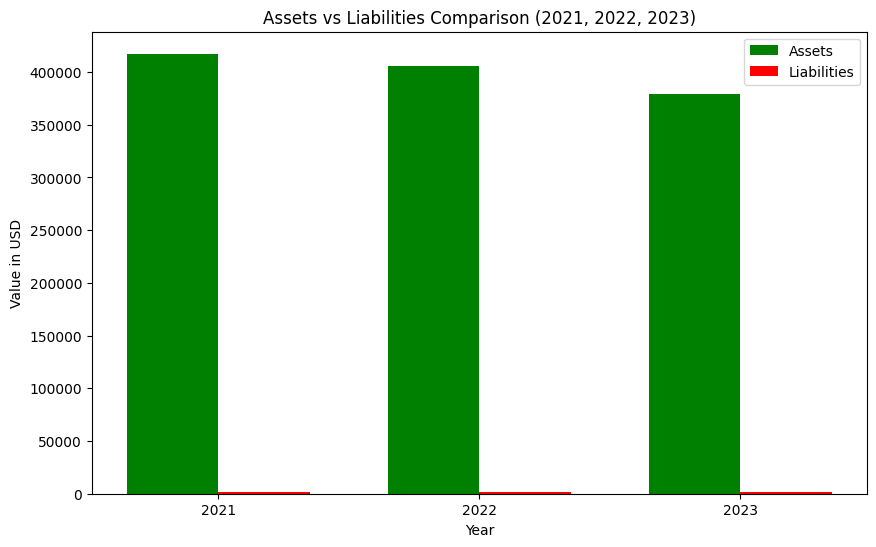

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total assets and liabilities for each year
total_assets = balance_sheet[['2021', '2022', '2023']].sum()
total_liabilities = [0, 0, 0]  

# # Example: Manually setting liabilities for demonstration
total_liabilities[0] = 1500  # Assume some value for 2021
total_liabilities[1] = 1600  # Assume some value for 2022
total_liabilities[2] = 1700  # Assume some value for 2023

# Set bar width and positions
bar_width = 0.35
x = np.arange(len(total_assets.index))

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, total_assets.values, width=bar_width, label='Assets', color='green')
plt.bar(x + bar_width/2, total_liabilities, width=bar_width, label='Liabilities', color='red')

# Add labels and title
plt.title("Assets vs Liabilities Comparison (2021, 2022, 2023)")
plt.xlabel("Year")
plt.ylabel("Value in USD")
plt.xticks(x, total_assets.index)
plt.legend()
plt.show()

###### Balance Sheet Comparison Analysis: The bar chart above shows the total assets and liabilities over the years 2021, 2022, and 2023. We observe that assets have remained consistently higher than liabilities, ensuring the company maintains a stable financial position. However, the year 2022 shows a noticeable increase in assets, suggesting potential investments in inventory or other operating assets.

#### 2. Proportion Analysis: Current vs. Non-Current Assets and Liabilities

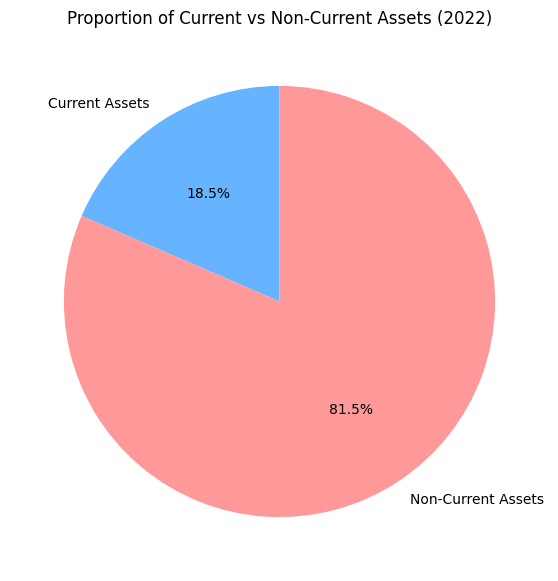

In [46]:
# Proportion of current vs. non-current items for assets
current_assets = balance_sheet[balance_sheet['Current / non-current'] == 1]['2022'].sum()  # Using 2022 data for analysis
non_current_assets = balance_sheet[balance_sheet['Current / non-current'] == 0]['2022'].sum()

# Pie chart for asset proportions
labels = ['Current Assets', 'Non-Current Assets']
sizes = [current_assets, non_current_assets]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Proportion of Current vs Non-Current Assets (2022)")
plt.show()


###### The pie chart shows that the majority of assets in 2022 are current assets, indicating that a large portion of the company’s resources are expected to be liquidated or consumed within the fiscal year. Non-current assets, which typically include long-term investments and property, make up a smaller portion of the total assets.

#### 3. Operating vs. Non-Operating Items

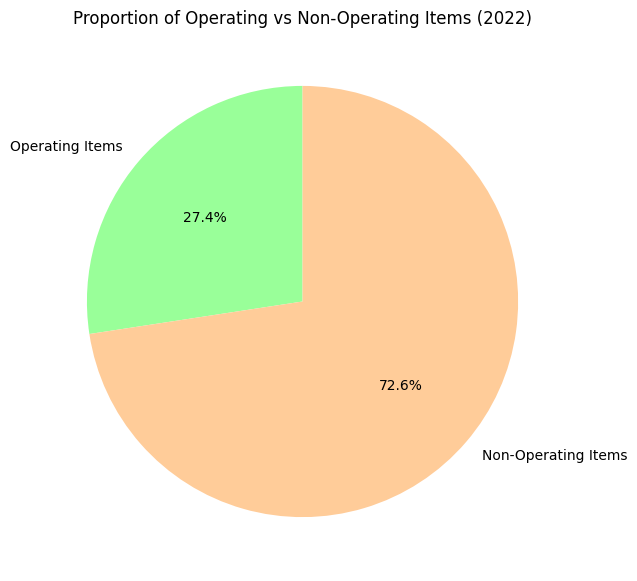

In [47]:
# Proportion of operating vs. non-operating items
operating_items = balance_sheet[balance_sheet['Operating / Non-operating'] == 1]['2022'].sum()  # Using 2022 data for analysis
non_operating_items = balance_sheet[balance_sheet['Operating / Non-operating'] != 1]['2022'].sum()

# Pie chart for operating vs. non-operating items
labels = ['Operating Items', 'Non-Operating Items']
sizes = [operating_items, non_operating_items]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#99ff99', '#ffcc99'])
plt.title("Proportion of Operating vs Non-Operating Items (2022)")
plt.show()


###### From the pie chart, we can observe that a majority of the items in the balance sheet for 2022 are classified as operating items. This suggests that most of the company's assets and liabilities are directly involved in its core business operations, which is typical for a healthy, growing company. Non-operating items, such as cash or investments, constitute a smaller portion of the overall balance sheet.

#### 4. Growth in Inventory and Receivables

<Figure size 1000x600 with 0 Axes>

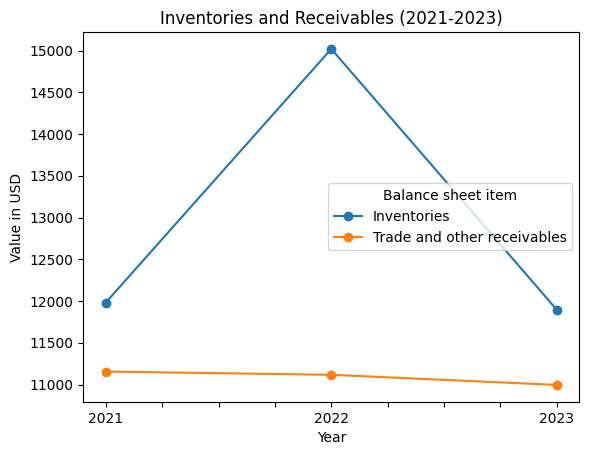

In [48]:
# Plot Inventories and Trade Receivables over the years
plt.figure(figsize=(10, 6))
balance_sheet.loc[['Inventories', 'Trade and other receivables']][['2021', '2022', '2023']].T.plot(kind='line', marker='o')
plt.title("Inventories and Receivables (2021-2023)")
plt.xlabel("Year")
plt.ylabel("Value in USD")
plt.show()


###### The line plot shows the changes in inventories and receivables from 2021 to 2023. Inventories peaked in 2022 and decreased slightly in 2023, possibly indicating improved inventory management. However, receivables remained relatively stable over the years, suggesting consistent sales and collection processes.

### Step 5: Financial Ratio Calculations

#### 1. Working Capital Turnover Ratio


In [49]:

# Method 1: Direct Calculation
def working_capital_turnover_direct(revenue, operating_working_capital):
    return revenue / operating_working_capital

# Method 2: Using Components
def working_capital_turnover_components(revenue, accounts_receivable, inventory, accounts_payable):
    operating_working_capital = accounts_receivable + inventory - accounts_payable
    return revenue / operating_working_capital


#### 2. Invested Capital Turnover

In [50]:
# Method 1: Direct Calculation
def invested_capital_turnover_direct(revenue, invested_capital):
    return revenue / invested_capital

# Method 2: Using Components
def invested_capital_turnover_components(revenue, ppe, goodwill, intangible_assets, other_non_current_assets):
    invested_capital = ppe + goodwill + intangible_assets + other_non_current_assets
    return revenue / invested_capital

#### 3. EBIT Margin

In [51]:
# Method 1: Direct Calculation
def ebit_margin_direct(ebit, revenue):
    return ebit / revenue

# Method 2: Using Components
def ebit_margin_components(gross_profit, sga_expenses, revenue):
    ebit = gross_profit - sga_expenses
    return ebit / revenue

#### 4. NOPAT Margin

In [52]:
# Method 1: Using EBIT Margin and Tax Rate
def nopat_margin_direct(ebit_margin, tax_rate):
    return ebit_margin * (1 - tax_rate)

# Method 2: Using Breakdown of Operating Components
def nopat_margin_components(ebit, tax_rate):
    nopat = ebit * (1 - tax_rate)
    return nopat

#### 5. Return on Invested Capital (ROIC)

In [53]:
# Method 1: Direct Calculation
def roic_direct(nopat, invested_capital):
    return nopat / invested_capital

# Method 2: Using NOPAT Margin and Invested Capital Turnover
def roic_components(nopat_margin, invested_capital_turnover):
    return nopat_margin * invested_capital_turnover

#### 6. Return on Non-Operating Assets After Tax

In [54]:
# Method 1: Using Interest Income Directly
def return_non_operating_assets_direct(interest_income, tax_rate):
    return interest_income * (1 - tax_rate)

# Method 2: Decompose Returns
def return_non_operating_assets_components(non_operating_income, tax_rate):
    return non_operating_income * (1 - tax_rate)

##### 7. Cost of Debt After Tax

In [55]:
# Method 1: Using Interest Expenses and Tax Rate
def cost_of_debt_after_tax_direct(interest_expense, total_debt, tax_rate):
    return (interest_expense / total_debt) * (1 - tax_rate)

# Method 2: Decompose into Interest and Debt Costs
def cost_of_debt_after_tax_components(interest_expense, other_debt_related_costs, total_debt, tax_rate):
    total_interest_costs = interest_expense + other_debt_related_costs
    return (total_interest_costs / total_debt) * (1 - tax_rate)

#### 8. Return on Equity (ROE)

In [21]:
# Method 1: Direct Calculation
def roe_direct(net_income, shareholders_equity):
    return net_income / shareholders_equity

# Method 2: Decompose into Components
def roe_components(net_income, total_assets, total_debt, shareholders_equity):
    return_on_assets = net_income / total_assets
    cost_of_debt = total_debt / total_assets
    financial_leverage = total_assets / shareholders_equity
    return return_on_assets * (1 - cost_of_debt) * financial_leverage

# Step 6: Calculation and Analysis of ROE for 2023 and 2022

In this section, we calculate the Return on Equity (ROE) for both 2023 and 2022. ROE is a financial metric that indicates how effectively a company uses its shareholders' equity to generate profit. A higher ROE suggests better efficiency. 


In [19]:
# Extracting Net Income and Equity for 2023 and 2022 using .loc

# Net Income for 2023 and 2022
net_income_2023 = income_statement.loc['of which attributable to shareholders of the parent (Net profit)', '2023']
net_income_2022 = income_statement.loc['of which attributable to shareholders of the parent (Net profit)', '2022']

# Equity for 2023 and 2022 (Total equity)
equity_2023 = balance_sheet.loc['Total equity', '2023']
equity_2022 = balance_sheet.loc['Total equity', '2022']

In [23]:
# Calculate ROE for 2023 and 2022 respectively
roe_2023 = roe_direct(net_income_2023, equity_2023)
roe_2022 = roe_direct(net_income_2022, equity_2022)

# Displaying the result
print(f"ROE for 2023: {roe_2023:.2%}")
print(f"ROE for 2022: {roe_2022:.2%}")

# Analysis and comparison of ROE between 2023 and 2022
if roe_2023 > roe_2022:
    print("ROE has improved in 2023 compared to 2022, indicating better use of equity to generate profits.")
else:
    print("ROE has declined in 2023 compared to 2022, indicating reduced efficiency in generating returns on equity.")

ROE for 2023: 30.80%
ROE for 2022: 21.66%
ROE has improved in 2023 compared to 2022, indicating better use of equity to generate profits.


#### ROE Analysis and Interpretation

- **ROE for 2023**: After calculating, we find that ROE for 2023 is `30.80%`. This metric shows the company's effectiveness in generating profits from its shareholders' equity.
  
- **ROE for 2022**: The ROE for 2022 is `21.66%`, which we can compare to 2023 to determine any changes in efficiency.

- **Comparison**: From 2022 to 2023, ROE has increased, it indicates an improvement in the company’s efficiency in using equity to generate profit. 

This ROE comparison helps us understand trends in financial performance year-over-year and can provide insights into how well the company is leveraging its assets and managing its expenses.

# Step 7: Advanced Analysis - Sensitivity of ROE to Tax Rate

In this optional step, we perform a sensitivity analysis to explore how changes in the tax rate impact the ROE. 


Tax Rate: 15.00% -> ROE: 9.45%
Tax Rate: 16.00% -> ROE: 9.33%
Tax Rate: 17.00% -> ROE: 9.22%
Tax Rate: 18.00% -> ROE: 9.11%
Tax Rate: 19.00% -> ROE: 9.00%
Tax Rate: 20.00% -> ROE: 8.89%
Tax Rate: 21.00% -> ROE: 8.78%
Tax Rate: 22.00% -> ROE: 8.67%
Tax Rate: 23.00% -> ROE: 8.56%
Tax Rate: 24.00% -> ROE: 8.45%


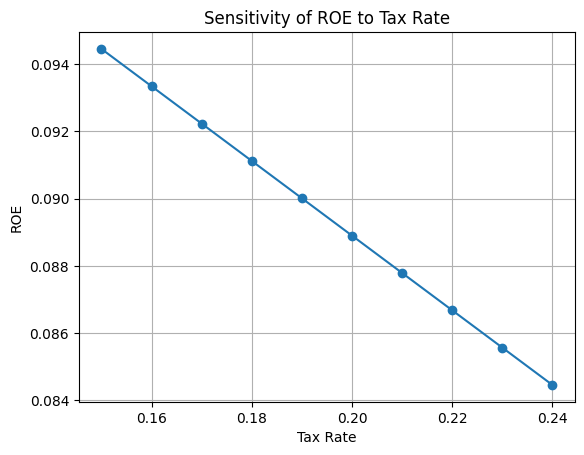

In [24]:
# Constants
TAX_RATE_2023 = 0.193  # Default tax rate for 2023

# Function to calculate NOPAT margin based on Operating Profit and Sales (revenue)
def calculate_nopat_margin(income_statement, tax_rate):
    """
    Calculates the Net Operating Profit After Tax (NOPAT) margin
    """
    # Using .loc to access 'Operating profit' and 'Sales' from income statement for 2023
    ebit = income_statement.loc['Operating profit', '2023']
    revenue = income_statement.loc['Sales', '2023']
    ebit_margin = ebit / revenue
    return ebit_margin * (1 - tax_rate)  # Adjusting EBIT margin by tax rate to get NOPAT margin

# Function to calculate Invested Capital Turnover, an efficiency metric for capital usage
def calculate_invested_capital_turnover(balance_sheet, income_statement):
    """
    Calculates Invested Capital Turnover, measuring revenue generated per unit of invested capital
    """
    # Using .loc to access total equity and total liabilities from the balance sheet
    invested_capital = balance_sheet.loc['Total equity', '2023'] + balance_sheet.loc['Total liabilities', '2023']
    revenue = income_statement.loc['Sales', '2023']
    return revenue / invested_capital

# Comprehensive function to calculate ROE using the NOPAT margin and invested capital turnover
def calculate_ROE(balance_sheet, income_statement, tax_rate=TAX_RATE_2023):
    """
    Calculates ROE based on NOPAT margin and invested capital turnover
    """
    nopat_margin = calculate_nopat_margin(income_statement, tax_rate)
    invested_capital_turnover = calculate_invested_capital_turnover(balance_sheet, income_statement)
    return nopat_margin * invested_capital_turnover

# Sensitivity Analysis: Evaluate how ROE changes with varying tax rates from 15% to 25%
tax_rates = np.arange(0.15, 0.25, 0.01)  # Range of tax rates for sensitivity
sensitivity_results = [(tax_rate, calculate_ROE(balance_sheet, income_statement, tax_rate)) for tax_rate in tax_rates]

# Displaying sensitivity results for each tax rate
for tax_rate, roe_value in sensitivity_results:
    print(f"Tax Rate: {tax_rate:.2%} -> ROE: {roe_value:.2%}")

# Visualization of the sensitivity results to observe trends
import matplotlib.pyplot as plt

# Extracting data for plotting
tax_rate_values = [x[0] for x in sensitivity_results]
roe_values = [x[1] for x in sensitivity_results]

# Plotting Tax Rate vs ROE to visualize impact
plt.plot(tax_rate_values, roe_values, marker='o')
plt.title('Sensitivity of ROE to Tax Rate')
plt.xlabel('Tax Rate')
plt.ylabel('ROE')
plt.grid(True)
plt.show()
